In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
try:
      file_path = 'Titanic-Dataset.csv'
      df_tit = pd.read_csv(file_path)
      print(f"Файл {file_path} загружен")

except Exception as e: # Catching a more general exception
      print(f"Ошибка загрузки файла: {e}")

Файл Titanic-Dataset.csv загружен


In [3]:
df_tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Набор Titanic-Dataset.csv from https://www.kaggle.com/datasets/yasserh/titanic-dataset
#Определяем выжил или нет
#Survived: выжил или нет: 0 = нет, 1 = да
#Pclass: класс билета: 1, 2, 3
#Name: Имя
#Sex: пол
#Age: возраст
#SibSp: количество братьев и сестер / супругов на борту «Титаника»
#Parch: количество родителей/детей на борту «Титаника»
#Ticket: номер билета
#Fare: cтоимость проезда
#Cabin: номер каюты
#Embarked: порт посадки: C = Шербур, Q = Куинстаун, S = Саутгемптон

In [ ]:
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df_tit["Survived"].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
# насколько я понимаю, в классе "Выжившие" намного меньше записей, из за-чего в расчете модели класс "Погибшие" будет иметь больший вес

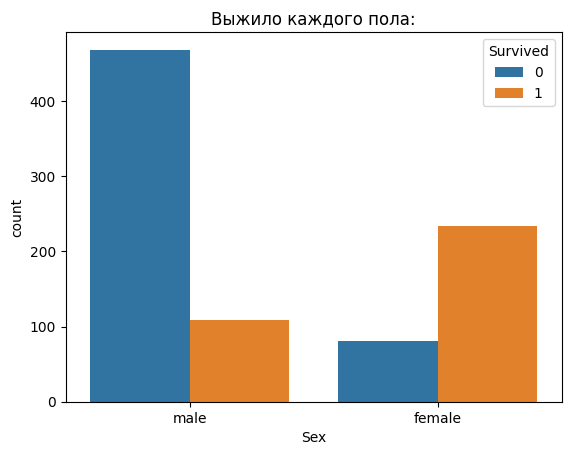

In [6]:
# Выжило каждого пола 0 = нет, 1 = да
sns.countplot(x="Sex", hue="Survived", data=df_tit)
plt.title("Выжило каждого пола")
plt.show()

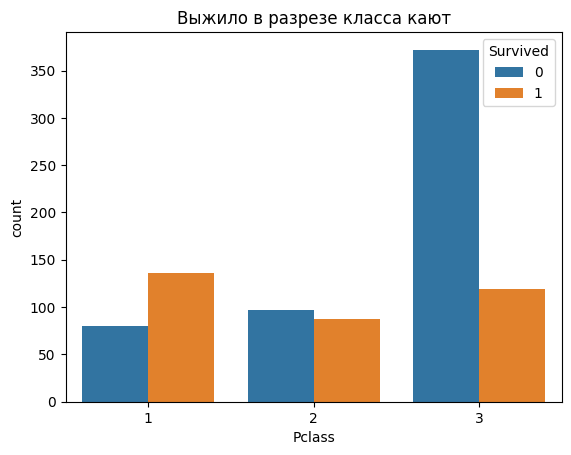

In [7]:
# Выжило в разрезе класса кают 0 = нет, 1 = да
sns.countplot(x="Pclass", hue="Survived", data=df_tit)
plt.title("Выжило в разрезе класса кают")
plt.show()

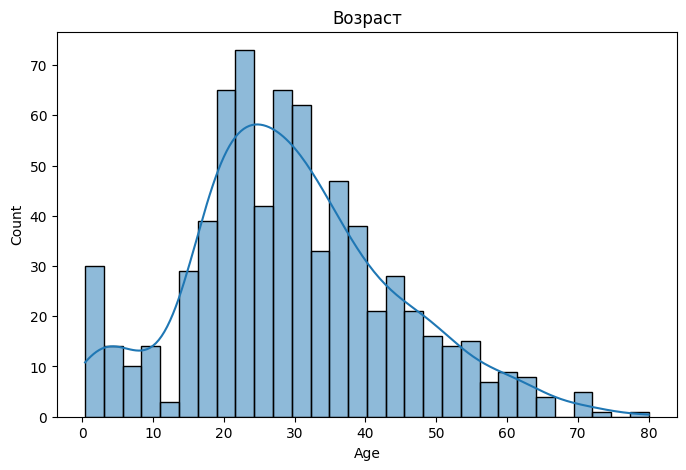

In [9]:
# График по возрастам
plt.figure(figsize=(8,5))
sns.histplot(df_tit["Age"].dropna(), kde=True, bins=30)
plt.title("Возраст")
plt.show()

In [11]:
#Пустые значения
print(df_tit.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
#Может и неправильно, но решил удалить некоторые столбцы
# PassengerId, Name, Ticket - не несут смысловой нагрузки по моему мнению
# Cabin - возможно было бы интересно, но почти все пустые
df_tit.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [14]:

df_tit['Sex'] = df_tit['Sex'].map({'male':0, 'female':1}) # в числа
df_tit.fillna({'Age':df_tit['Age'].median()}, inplace = True) # пропуски заполним медианным значением
df_tit['Embarked'].fillna(df_tit['Embarked'].mode()[0], inplace=True) # пропуски заполним наиболее часто встречающимся значением

# Encode categorical features
le = LabelEncoder()
for col in ['Embarked']:
    data[col] = le.fit_transform(data[col])

/tmp/ipython-input-654333267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tit['Embarked'].fillna(df_tit['Embarked'].mode()[0], inplace=True)


In [17]:
# Encode categorical features
le = LabelEncoder()
for col in ['Embarked']:
    df_tit[col] = le.fit_transform(df_tit[col])

In [18]:
df_tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


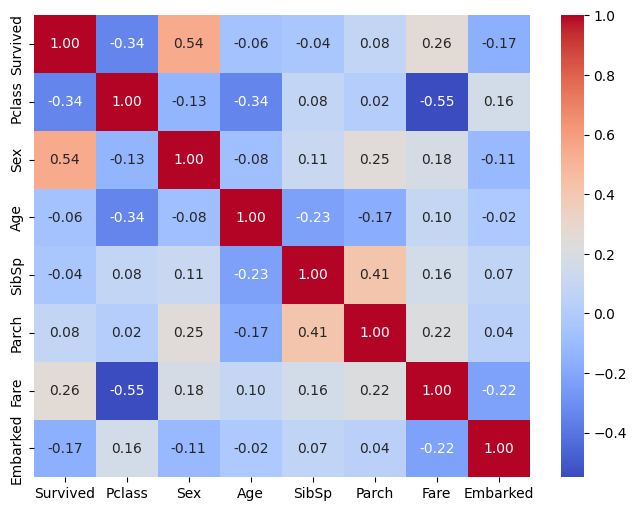

In [19]:
#Посмтрим теперь корреляцию
import matplotlib.pyplot as plt
import seaborn as sns

corr=df_tit.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_tit.drop(columns=['Survived'])
y = df_tit['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Тренировка:", X_train_scaled.shape)
print("Тест:",X_test_scaled.shape)

Тренировка: (712, 7)
Тест: (179, 7)


In [25]:
!pip install -q catboost xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [60]:
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#список моделей для сравнения
models = {
     "CatBoost": CatBoostClassifier (iterations=500, learning_rate=0.05, depth=6, verbose=False),
     "AdaBoost": AdaBoostClassifier(n_estimators=250, random_state=42),
     "GradientBoosting": GradientBoostingClassifier(random_state=42),
     "DecisionTree": DecisionTreeClassifier(random_state=42),
     "KNeighbors": KNeighborsClassifier(n_neighbors=11)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred  = model.predict(X_test_scaled)
    results[name] = accuracy_score(y_test, y_pred )

print("Model Accuracies:")
for k,v in results.items():
    print(f"{k}: {v:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\nBest Model:", best_model_name)

Model Accuracies:
CatBoost: 0.8212
AdaBoost: 0.8101
GradientBoosting: 0.8101
DecisionTree: 0.7821
KNeighbors: 0.7989

Best Model: CatBoost


In [61]:
print("\nClassification Report (Best Model):\n", classification_report(y_test, best_model.predict(X_test_scaled)))


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [62]:
print("Confusion Matrix (Best model):\n", confusion_matrix(y_test, best_model.predict(X_test_scaled)))

Confusion Matrix (Best model):
 [[91 14]
 [18 56]]


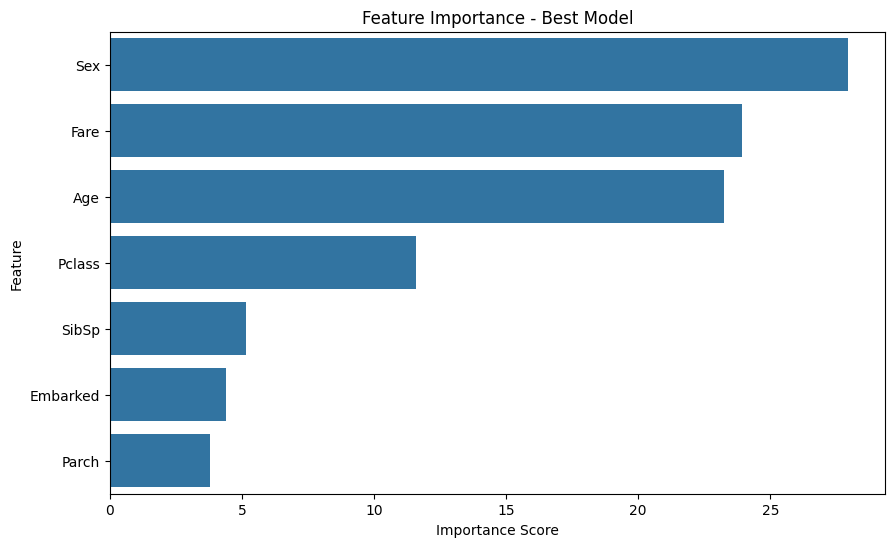

    Feature  Importance
1       Sex   27.936431
5      Fare   23.921499
2       Age   23.229213
0    Pclass   11.582579
3     SibSp    5.155063
6  Embarked    4.383122
4     Parch    3.792092


In [63]:
importances = best_model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance - Best Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print(feat_imp)

In [64]:
print(df_tit["Survived"].value_counts())
#Выживших намного меньше чем погибших, попробуем сбалансировать классы и выполнить модели

Survived
0    549
1    342
Name: count, dtype: int64


In [65]:
#------OVERSAMPLING---------:
#количество выживших увеличим до количества погибших
#Простое повторное использование данных заключается в увеличении числа экземпляров класса-меньшинства
#путем случайного повторного выбора данных из этого класса до достижения желаемой пропорции между классами
from imblearn.over_sampling import RandomOverSampler

print("Размерность базовая X_train_scaled:", X_train_scaled.shape)
print("Размерность базовая y_train:", y_train.shape)

print("Разбивка базовая по классам:", y_train.value_counts())

Размерность базовая X_train_scaled: (712, 7)
Размерность базовая y_train: (712,)
Разбивка базовая по классам: Survived
0    444
1    268
Name: count, dtype: int64


In [66]:
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
print("Новая размерность X_res:", X_train_over.shape)
print("Новая размерность y_res:", y_train_over.shape)
print("Разбивка новая по классам:", y_train_over.value_counts())

Новая размерность X_res: (888, 7)
Новая размерность y_res: (888,)
Разбивка новая по классам: Survived
0    444
1    444
Name: count, dtype: int64


In [67]:
#По обоим классам теперь 444 - по значению большего класса

In [68]:
results_over = {}
for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred  = model.predict(X_test_scaled)
    results_over[name] = accuracy_score(y_test, y_pred )

print("Model Accuracies:")
for k,v in results_over.items():
    print(f"{k}: {v:.4f}")

best_model_over_name = max(results_over, key=results_over.get)
best_model_over = models[best_model_over_name]

print("\nBest Model:", best_model_over_name)

#Oversampling/ Undersampling
#Model Accuracies:
#CatBoost: 0.8212
#AdaBoost: 0.8101
#GradientBoosting: 0.8101
#DecisionTree: 0.7821
#KNeighbors: 0.7989

#Best Model: CatBoost

Model Accuracies:
CatBoost: 0.8156
AdaBoost: 0.7877
GradientBoosting: 0.8212
DecisionTree: 0.7877
KNeighbors: 0.7709

Best Model: GradientBoosting


In [69]:
print("\nClassification Report (Best Model):\n", classification_report(y_test, best_model_over.predict(X_test_scaled)))

#Oversampling/ Undersampling
#Classification Report:
#               precision    recall  f1-score   support
#
#           0       0.83      0.87      0.85       105
#           1       0.80      0.76      0.78        74
#
#    accuracy                           0.82       179
#   macro avg       0.82      0.81      0.81       179
#weighted avg       0.82      0.82      0.82       179


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       105
           1       0.77      0.81      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [70]:
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, best_model_over.predict(X_test_scaled)))
 #Oversampling/ Undersampling
 #[[91 14]
 #[18 56]]

Confusion Matrix (Best Model):
 [[87 18]
 [14 60]]


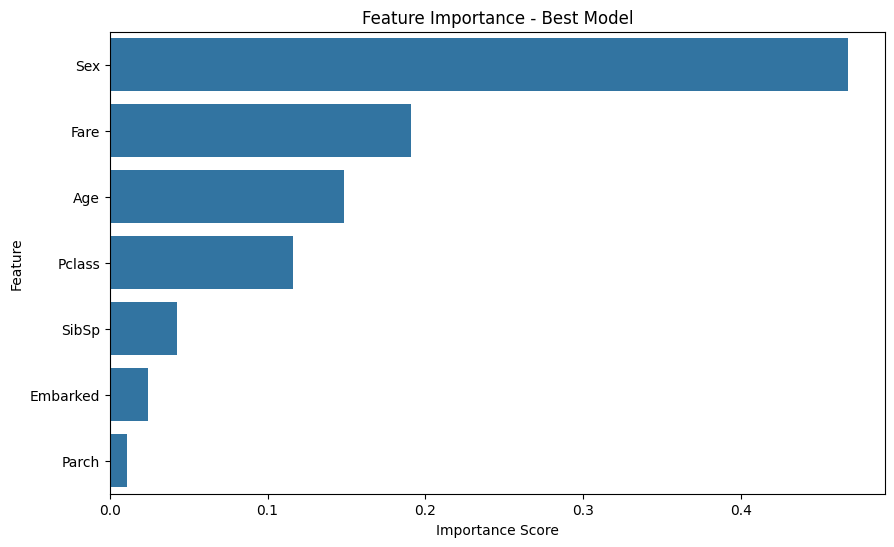

    Feature  Importance
1       Sex    0.467796
5      Fare    0.190600
2       Age    0.148289
0    Pclass    0.116129
3     SibSp    0.042385
6  Embarked    0.024051
4     Parch    0.010751


In [71]:
importances = best_model_over.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance - Best Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print(feat_imp)
#Oversampling/ Undersampling
#    Feature  Importance
#1       Sex   27.936431
#5      Fare   23.921499
#2       Age   23.229213
#0    Pclass   11.582579
#3     SibSp    5.155063
#6  Embarked    4.383122
#4     Parch    3.792092

In [72]:
#------UNDERSAMPLING---------:
#количество погибших уменьшим до количества выживших
#Процесс заключается в случайном удалении части примеров из большего класса до достижения желаемого баланса.
from imblearn.under_sampling import RandomUnderSampler

print("Размерность базовая X_train_scaled:", X_train_scaled.shape)
print("Размерность базовая y_train:", y_train.shape)

print("Разбивка базовая по классам:", y_train.value_counts())

Размерность базовая X_train_scaled: (712, 7)
Размерность базовая y_train: (712,)
Разбивка базовая по классам: Survived
0    444
1    268
Name: count, dtype: int64


In [73]:
ros = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = ros.fit_resample(X_train_scaled, y_train)
print("Новая размерность X_train_under:", X_train_under.shape)
print("Новая размерность y_train_under:", y_train_under.shape)
print("Разбивка новая по классам:", y_train_under.value_counts())

Новая размерность X_res: (536, 7)
Новая размерность y_res: (536,)
Разбивка новая по классам: Survived
0    268
1    268
Name: count, dtype: int64


In [ ]:
#По обоим классам теперь 268 - по значению меньшего класса

In [74]:
results_under = {}
for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    y_pred  = model.predict(X_test_scaled)
    results_under[name] = accuracy_score(y_test, y_pred )

print("Model Accuracies:")
for k,v in results_under.items():
    print(f"{k}: {v:.4f}")

best_model_under_name = max(results_under, key=results_under.get)
best_model_under = models[best_model_under_name]

print("\nBest Model:", best_model_under_name)

#Oversampling/ Undersampling
#Model Accuracies:
#CatBoost: 0.8212
#AdaBoost: 0.8101
#GradientBoosting: 0.8101
#DecisionTree: 0.7821
#KNeighbors: 0.7989

#Best Model: CatBoost

Model Accuracies:
CatBoost: 0.8156
AdaBoost: 0.7877
GradientBoosting: 0.8156
DecisionTree: 0.7765
KNeighbors: 0.7765

Best Model: CatBoost


In [76]:
print("\nClassification Report (Best Model):\n", classification_report(y_test, best_model_under.predict(X_test_scaled)))

#Oversampling/ Undersampling
#Classification Report:
#               precision    recall  f1-score   support
#
#           0       0.83      0.87      0.85       105
#           1       0.80      0.76      0.78        74
#
#    accuracy                           0.82       179
#   macro avg       0.82      0.81      0.81       179
#weighted avg       0.82      0.82      0.82       179


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       105
           1       0.74      0.85      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



In [77]:
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, best_model_under.predict(X_test_scaled)))
 #Oversampling/ Undersampling
 #[[91 14]
 #[18 56]]

Confusion Matrix (Best Model):
 [[83 22]
 [11 63]]


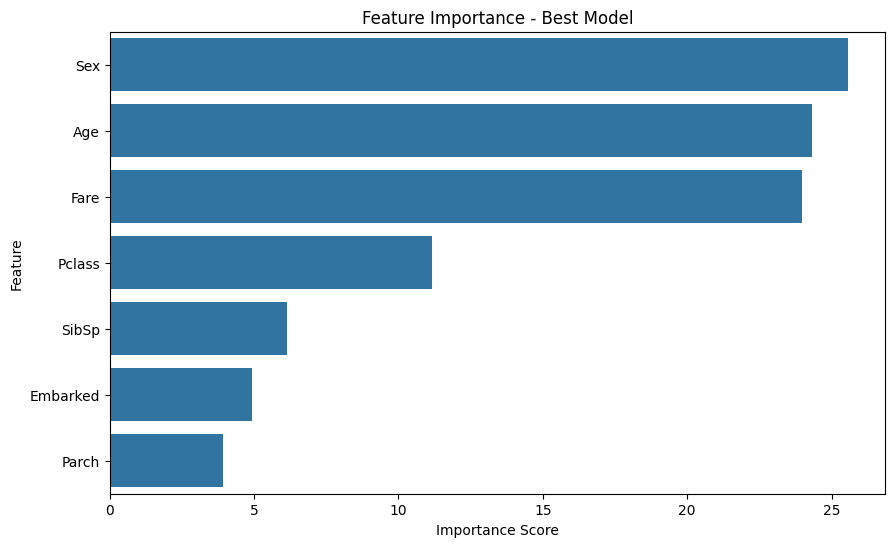

    Feature  Importance
1       Sex   25.566440
2       Age   24.339459
5      Fare   23.960458
0    Pclass   11.167895
3     SibSp    6.123519
6  Embarked    4.918464
4     Parch    3.923765


In [78]:
importances = best_model_under.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance - Best Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print(feat_imp)
#Без Oversampling/ Undersampling
#    Feature  Importance
#1       Sex   27.936431
#5      Fare   23.921499
#2       Age   23.229213
#0    Pclass   11.582579
#3     SibSp    5.155063
#6  Embarked    4.383122
#4     Parch    3.792092

In [ ]:
#Ну как бы по классу выживших матрица стала немного лучше обоих случаях (OVER и UDER), но точность моделей немного понизилась, вес пола в OVER сильно увеличился и поменялся фаворит
#Думаю, что на этот dataset оба способа балансировки классов оказывают не большое влияние